In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv("binary.csv")
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [7]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [8]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Text(0.5, 0, 'gpa')

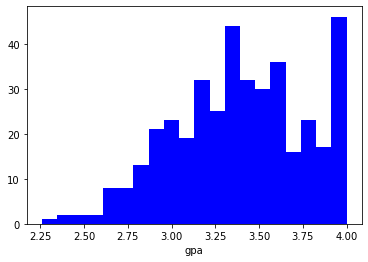

In [32]:
plt.hist(data['gpa'], bins=20, color='blue')
plt.xlabel('gpa')


Text(0.5, 0, 'gpa')

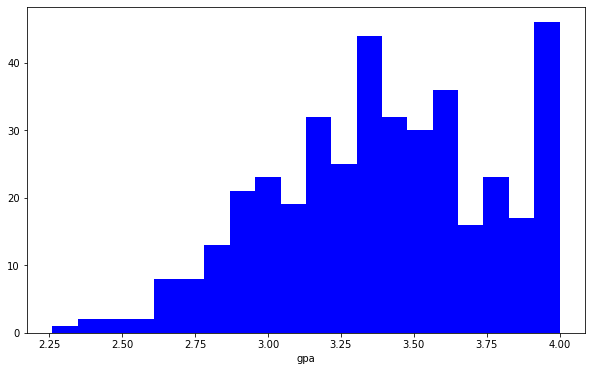

In [34]:
plt.figure(figsize=(10,6))
plt.hist(data['gpa'], bins=20, color='blue')
plt.xlabel('gpa')


Text(0.5, 0, 'GPA')

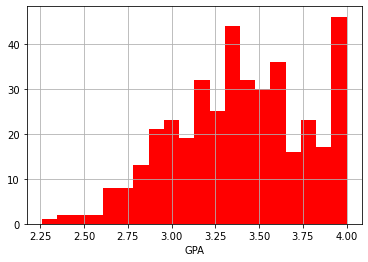

In [35]:
data['gpa'].hist(bins=20, color='red')  # same output as above
plt.xlabel('GPA')

<AxesSubplot:>

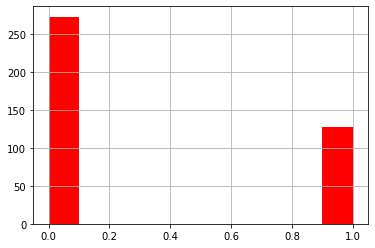

In [37]:
data['admit'].hist(color='red')


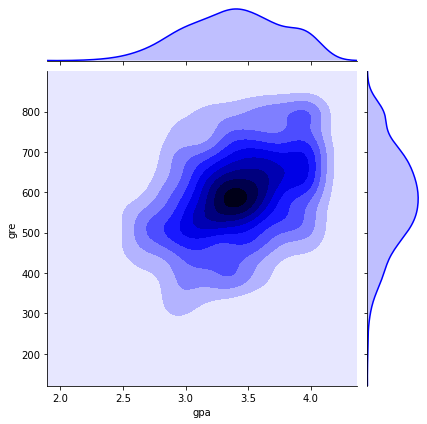

In [44]:
sns.jointplot(x='gpa', y='gre', data=data, color='blue', kind='kde')

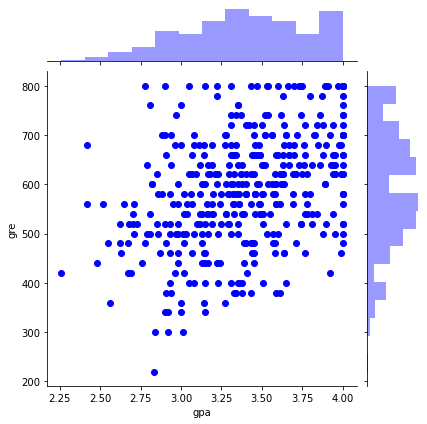

In [43]:
sns.jointplot(x='gpa', y='gre', data=data, color='blue')

In [45]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [49]:
# we need to create a variable for rank, istead of rank 1 to 4, it would be rank1, rank2....rank4

dummy_ranks= pd.get_dummies(data['rank'],prefix='rank')  # new comands
dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [52]:
cols_we_need = ['admit', 'gre', 'gpa']
cols_we_need

['admit', 'gre', 'gpa']

In [53]:
data[cols_we_need].join(dummy_ranks)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
...,...,...,...,...,...,...,...
395,0,620,4.00,0,1,0,0
396,0,560,3.04,0,0,1,0
397,0,460,2.63,0,1,0,0
398,0,700,3.65,0,1,0,0


In [67]:
dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [71]:
data1 = data[cols_we_need].join(dummy_ranks.iloc[:,1:4])  #remember this column sorting.
data1

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1
...,...,...,...,...,...,...
395,0,620,4.00,1,0,0
396,0,560,3.04,0,1,0
397,0,460,2.63,1,0,0
398,0,700,3.65,1,0,0


In [73]:
data1.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [76]:
from sklearn.model_selection import train_test_split  # new commands

In [82]:
X = data1[['gre','gpa','rank_2','rank_3','rank_4']]
y = data1 ['admit']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 20)

In [87]:
print (X_train.shape)
print (X_test.shape)

(280, 5)
(120, 5)


In [88]:
print (y_train.shape)
print (y_test.shape)

(280,)
(120,)


In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
model = LogisticRegression()

In [91]:
model.fit(X_train, y_train)

LogisticRegression()

In [99]:
prediction_X= model.predict(X_test)
prediction_X

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [100]:
from sklearn.metrics import classification_report

In [101]:
print (classification_report (y_test, prediction_X))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        84
           1       0.48      0.28      0.35        36

    accuracy                           0.69       120
   macro avg       0.61      0.57      0.57       120
weighted avg       0.66      0.69      0.66       120



In [102]:
data1.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [ ]:
# building logistic  Regression using GRE and GPA

In [103]:
X = data1[['gre', 'gpa']]
y = data1['admit']

In [105]:
print (X.shape)
print (y.shape)

(400, 2)
(400,)


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state= 23)

In [108]:
print (X_train.shape)
print (y_train.shape)

(280, 2)
(280,)


In [109]:
print (y_train.shape)
print (y_test.shape)

(280,)
(120,)


In [110]:
model2 = LogisticRegression()

In [112]:
model2.fit(X_train, y_train)

LogisticRegression()

In [114]:
prediction2 = model2.predict(X_test)
prediction2 

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [117]:
print (classification_report (y_test, prediction2))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        88
           1       0.33      0.09      0.15        32

    accuracy                           0.71       120
   macro avg       0.54      0.51      0.49       120
weighted avg       0.63      0.71      0.64       120

